In [93]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

plt.rcParams['figure.figsize'] = [12, 7]

In [121]:
# !wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")

(-0.5, 639.5, 479.5, -0.5)

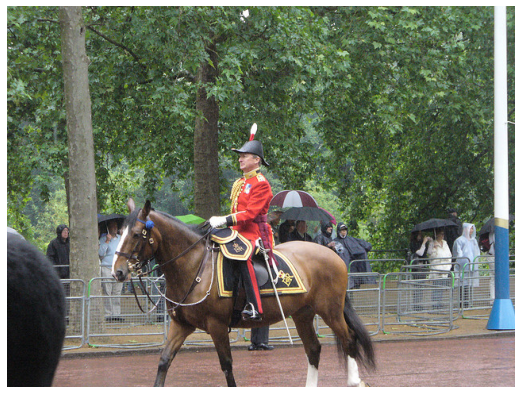

In [122]:
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [126]:
cfg = get_cfg()
cfg.MODEL.DEVICE = 'cpu'

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im[:, :, ::-1])

In [127]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([17,  0,  0,  0,  0, 25, 25,  0,  0, 25,  0,  0, 17])
Boxes(tensor([[124.6309, 246.0555, 464.5736, 480.0000],
        [250.5950, 157.1207, 339.5731, 408.2415],
        [ 49.3506, 274.3738,  80.1652, 342.3896],
        [  0.0000, 284.6656,  78.5014, 478.5184],
        [386.0469, 270.9830, 411.8350, 303.1007],
        [334.2236, 251.3125, 414.0236, 277.6147],
        [331.4684, 231.2236, 393.7104, 257.4648],
        [561.0319, 271.5630, 594.9162, 390.1004],
        [512.4014, 276.6873, 563.4663, 389.4302],
        [329.3685, 230.3824, 402.1460, 278.3008],
        [526.8883, 277.4476, 561.6942, 344.5837],
        [114.9138, 268.0710, 145.6501, 397.1750],
        [113.1456, 267.1171, 159.3613, 395.6359]]))


In [134]:
type(outputs["instances"])

detectron2.structures.instances.Instances

(-0.5, 767.5, 575.5, -0.5)

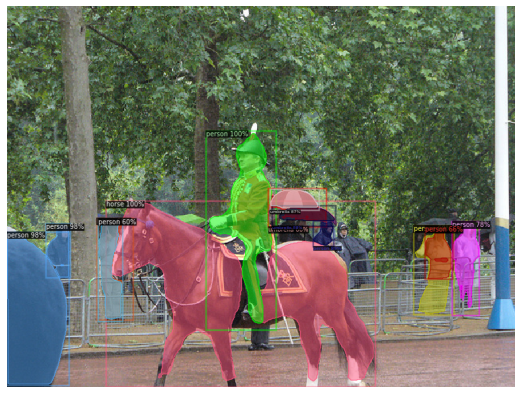

In [128]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"])
plt.imshow(out.get_image())
plt.axis('off')

In [101]:
outputs["instances"]

Instances(num_instances=15, image_height=480, image_width=640, fields=[pred_boxes: Boxes(tensor([[126.6049, 244.8984, 459.8287, 480.0000],
        [251.1093, 157.8128, 338.9732, 413.6367],
        [114.8497, 268.6858, 148.2353, 398.8107],
        [  0.8217, 281.0327,  78.6073, 478.4209],
        [ 49.3954, 274.1232,  80.1549, 342.9802],
        [561.2246, 271.5817, 596.2748, 385.2531],
        [385.9072, 270.3125, 413.7130, 304.0397],
        [515.9296, 278.3742, 562.2794, 389.3802],
        [335.2410, 251.9167, 414.7491, 275.9375],
        [350.9302, 269.2061, 386.0984, 297.9080],
        [331.6292, 230.9996, 393.2759, 257.2009],
        [510.7349, 263.2655, 570.9864, 295.9194],
        [409.0841, 271.8646, 460.5582, 356.8722],
        [506.8766, 283.3257, 529.9404, 324.0391],
        [594.5659, 283.4807, 609.0584, 311.4129]])), scores: tensor([0.9997, 0.9957, 0.9915, 0.9882, 0.9861, 0.9840, 0.9769, 0.9716, 0.9062,
        0.9037, 0.8870, 0.8575, 0.6592, 0.5899, 0.5766]), pred_classes

In [135]:
# Inference with a keypoint detection model
cfg = get_cfg()   # get a fresh new config
cfg.MODEL.DEVICE = 'cpu'
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [136]:
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.0)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

In [139]:
outputs["instances"].pred_keypoints.shape

torch.Size([10, 17, 3])

(-0.5, 639.5, 479.5, -0.5)

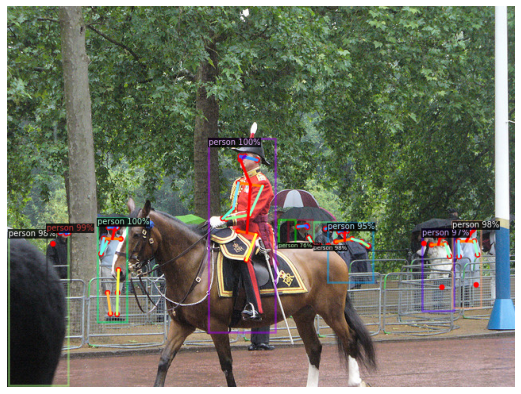

In [9]:
plt.imshow(out.get_image())
plt.axis('off')

In [92]:
outputs['instances']

Instances(num_instances=0, image_height=94, image_width=121, fields=[pred_boxes: Boxes(tensor([], size=(0, 4))), scores: tensor([]), pred_classes: tensor([], dtype=torch.int64), pred_keypoints: tensor([], size=(0, 17, 3)), pred_keypoint_heatmaps: tensor([], size=(0, 17, 56, 56))])

# my pics

(159, 160, 3)


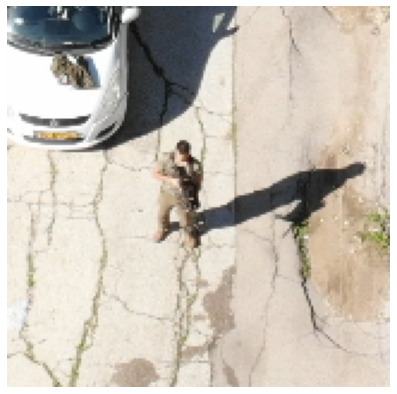

In [27]:
im = cv2.imread("../data/2_no_aim.png")
plt.imshow(im[:,:,::-1])
plt.axis('off')
print(im.shape)

In [28]:
# Inference with a keypoint detection model
cfg = get_cfg()   # get a fresh new config
cfg.MODEL.DEVICE = 'cpu'
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

(-0.5, 159.5, 158.5, -0.5)

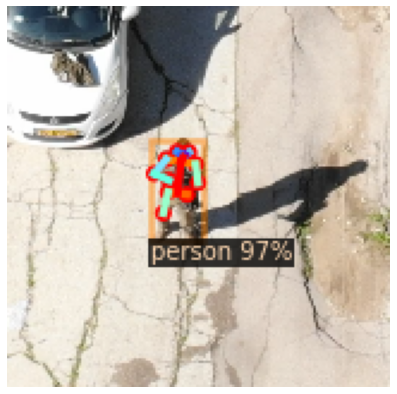

In [29]:
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.0)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image())
plt.axis('off')

In [79]:
def make_predictor():
    cfg = get_cfg()   # get a fresh new config
    cfg.MODEL.DEVICE = 'cpu'
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
    predictor = DefaultPredictor(cfg)
    
    return predictor, cfg

def plot_output(ax, outputs, cfg):
    v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.0)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    print(out.get_image().shape)
    ax.imshow(out.get_image())
    ax.axis('off')

(135, 139, 3)
(135, 139, 3)


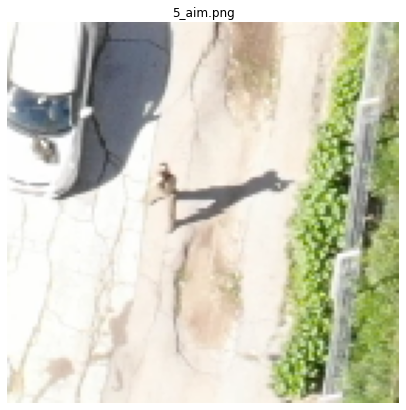

(127, 153, 3)
(127, 153, 3)


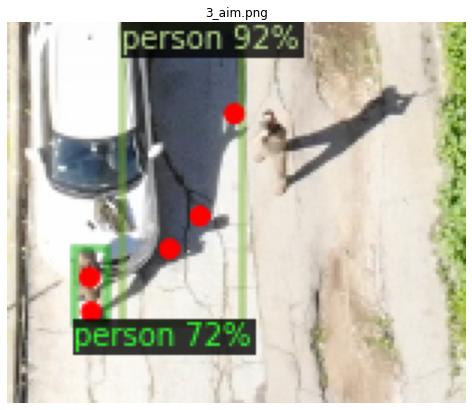

(94, 121, 3)
(94, 121, 3)


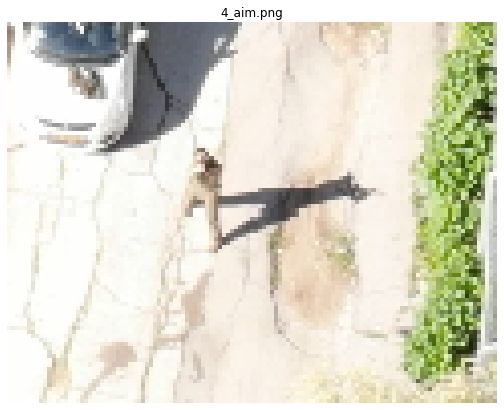

(159, 160, 3)


KeyboardInterrupt: 

In [80]:
import os

predictor, cfg = make_predictor()

for file_name in os.listdir('../data'):
    if not file_name.endswith('.png'):
        continue
        
    file_path = os.path.join('../data', file_name)
    im = cv2.imread(file_path)
    print(im.shape)
    
    outputs = predictor(im)
    
    fig, ax = plt.subplots()
    plot_output(ax, outputs, cfg)
    
    ax.set_title(file_name)
    plt.show()
#     break
    

In [88]:
data_dir = '../data'
path = os.path.join(data_dir, '1_DJI_0277.MOV')

In [89]:
cap = cv2.VideoCapture(path)
_, frame = cap.read()
fshape = frame.shape
fheight = fshape[0]
fwidth = fshape[1]
fps = cap.get(cv2.CAP_PROP_FPS)

print(fheight, fwidth)

1080 1920


In [90]:
out = cv2.VideoWriter('output.MOV',-1, fps, (fwidth,fheight))

In [91]:
while (cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        
        out.write(frame)
    else:
        break